#### Lets Grow More(LGMVIP)- "DATA SCIENCE INTERN "
#### LGMVIP April- 2023
#### AUTHOR - KHUSHBOO SINGH
### BEGINNER LEVEL TASK

## Task 1: Iris Flowers Classification ML Project

### Business Case: Create the Decision Tree classifier and visualize it graphically.
The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data.

In [22]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Loading the Data
data=pd.read_csv("Iris.csv")

In [3]:
# First five rows
data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [4]:
# Last five rows
data.tail()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2
149,149,5.9,3.0,5.1,1.8,2


In [5]:
# Columns in data
data.columns

Index(['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'target'],
      dtype='object')

In [6]:
# Shape of data (Rows, Columns)
data.shape

(150, 6)

* This data contains 150 rows & 6 columns .

In [7]:
# Statistics of data
data.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   target        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [9]:
# Checking the presence of null values
data.isnull().sum()

Unnamed: 0      0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [10]:
# Checking the covariance 
data.cov()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
Unnamed: 0,1887.500000,25.782886,-7.492282,67.667785,29.832215,33.557047
sepal_length,25.782886,0.685694,-0.039268,1.273682,0.516904,0.530872
sepal_width,-7.492282,-0.039268,0.188004,-0.321713,-0.117981,-0.148993
petal_length,67.667785,1.273682,-0.321713,3.113179,1.296387,1.371812
petal_width,29.832215,0.516904,-0.117981,1.296387,0.582414,0.597987
target,33.557047,0.530872,-0.148993,1.371812,0.597987,0.671141


### Domain analysis

1. Sepal length in cm

2. Sepal width in cm

3. Petal length in cm

4. Petal width in cm

5. Class:
-- Iris Setosa

-- Iris Versicolour

-- Iris Virginica



### Exploratory Data Analysis

#### Univariate analysis

<AxesSubplot:>

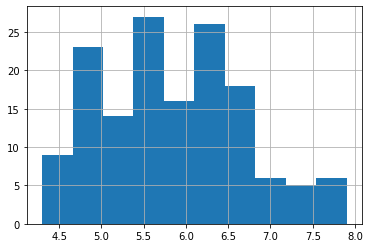

In [11]:
data['sepal_length'].hist()

<AxesSubplot:>

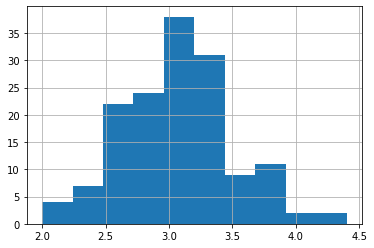

In [12]:
data['sepal_width'].hist()

<AxesSubplot:>

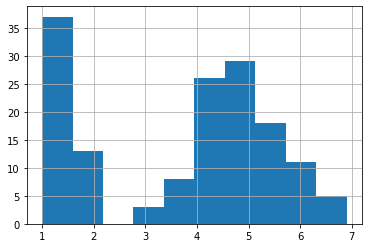

In [13]:
data['petal_length'].hist()

<AxesSubplot:>

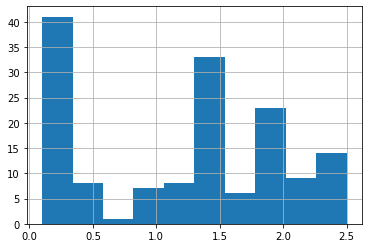

In [14]:
 data['petal_width'].hist()

<AxesSubplot:xlabel='sepal_length', ylabel='target'>

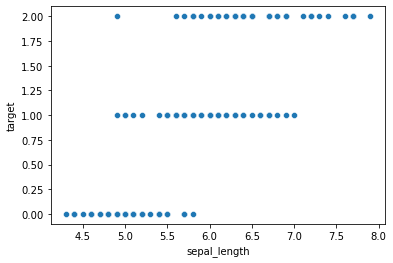

In [15]:
sns.scatterplot(x='sepal_length',y='target',data=data)

<AxesSubplot:xlabel='sepal_width', ylabel='target'>

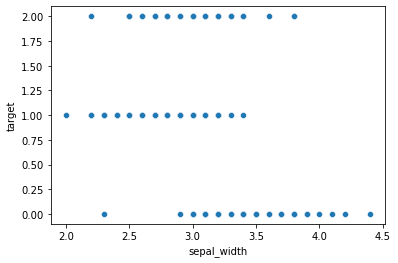

In [16]:
sns.scatterplot(x='sepal_width',y='target',data=data)

<AxesSubplot:xlabel='petal_length', ylabel='target'>

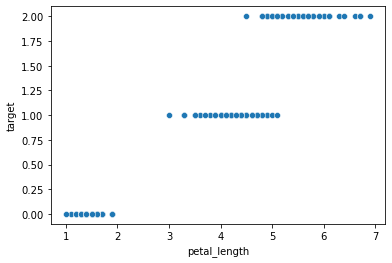

In [17]:
sns.scatterplot(x='petal_length',y='target',data=data)

<AxesSubplot:xlabel='petal_width', ylabel='target'>

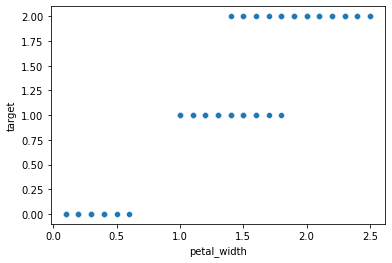

In [18]:
sns.scatterplot(x='petal_width',y='target',data=data)

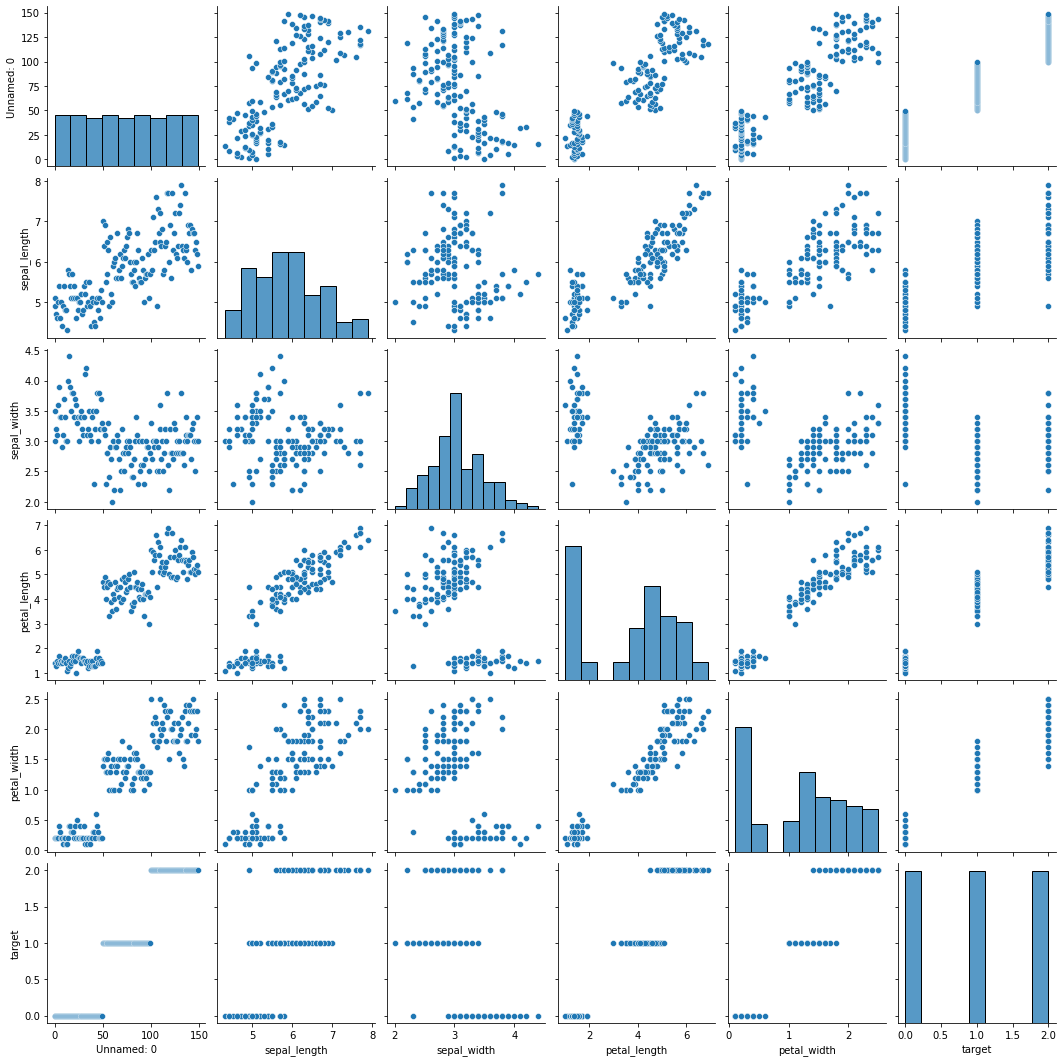

In [19]:
sns.pairplot(data)

### Data Preprocessing & Feature Engineering

In [20]:
# Checking the missing values
data.isnull().sum()

Unnamed: 0      0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

* No missing values present.

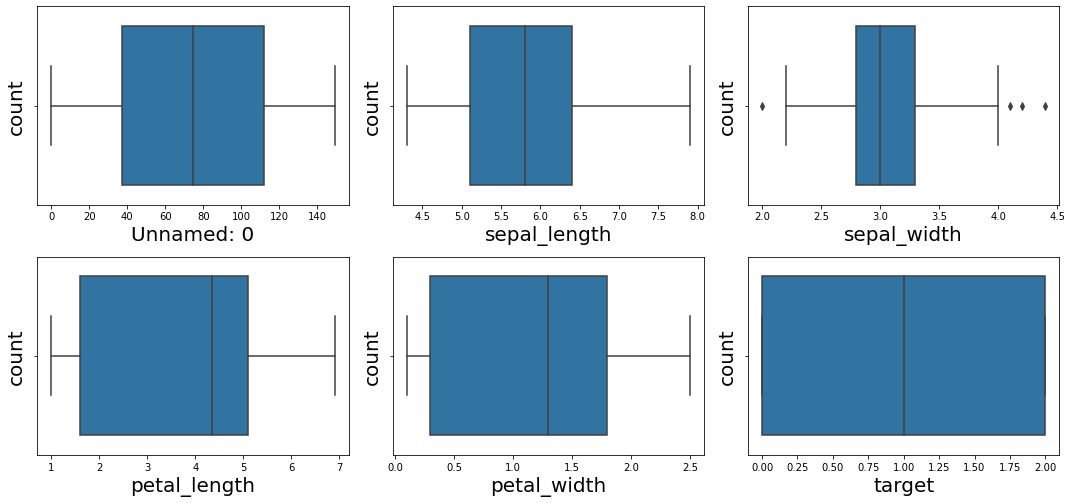

In [25]:
## Checking the outliers
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=10:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column],data=data)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

* Outliers are present in sepal width.

#### Handling Outliers

In [26]:
# using Interquantile Range(IQR)
from scipy import stats
IQR = stats.iqr(data.sepal_width,interpolation='midpoint')
IQR

0.5

In [27]:
# minimum & maximum limit calculation
# 1st quantile
Q1 = data.sepal_width.quantile(0.25)
# 3rd quantile
Q3 = data.sepal_width.quantile(0.75)
# minimum limit
minimum_limit = Q1-1.5*IQR
# maximum limit
maximum_limit = Q3+1.5*IQR

In [28]:
print('minimum_limit',minimum_limit)
print('maximum_limit',maximum_limit)

minimum_limit 2.05
maximum_limit 4.05


In [29]:
data.loc[data['sepal_width']< minimum_limit]

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
60,60,5.0,2.0,3.5,1.0,1


In [30]:
data.loc[data['sepal_width']> maximum_limit]

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
15,15,5.7,4.4,1.5,0.4,0
32,32,5.2,4.1,1.5,0.1,0
33,33,5.5,4.2,1.4,0.2,0


<AxesSubplot:xlabel='sepal_width'>

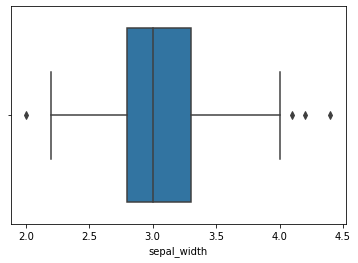

In [31]:
sns.boxplot(data.sepal_width)

### Feature Selection

<AxesSubplot:>

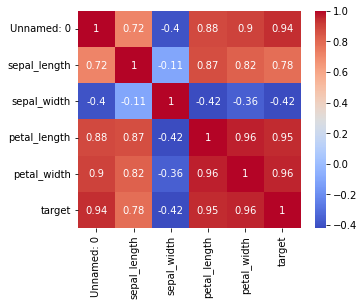

In [32]:
corr=data.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')
     

In [33]:
# Removing the constant features.
data.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Creation

In [35]:
# Creating dependent & independent variables
x =data.drop('target',axis=1)
y=data.target

In [36]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

### Linear Regression Model

In [37]:
# Model Selection
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [38]:
y_predict=LR.predict(x_test)
y_predict

array([ 0.02675091,  0.07165763,  1.276149  ,  1.7725269 , -0.0635249 ,
        1.25077714, -0.06214427,  1.34411815,  2.08374485,  1.74500811,
        1.98515295,  2.03090348,  0.23587048,  0.07843058,  1.52220834,
        1.21954348, -0.01084604,  1.3111683 ,  1.3269104 ,  1.82976443,
        0.05517744,  2.04438542,  1.47158838,  1.2245931 , -0.07397736,
       -0.06214427,  1.17986656,  1.98689736, -0.06392742,  1.22537707,
        0.1551394 ,  1.24242231,  1.54225896, -0.04183256,  1.19030137,
        1.20912976, -0.09084956,  1.9468954 ,  1.38243553, -0.20028931,
        2.17035879,  1.25844357,  1.01753242,  1.69703618,  1.3669511 ])

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
r2score_lr = r2_score(y_test,y_predict)
r2score_lr

0.9134136909541447

In [41]:
x_test.shape

(45, 4)

In [42]:
# Calculation of adjusted r2_score
adjusted_r2=1-(1-0.88)*(45-4)/(45-4-1)
adjusted_r2

0.877

In [43]:
MSE=print(mean_squared_error(y_test,y_predict))

0.05156695738730937


In [44]:
import math

In [45]:
RMSE=print(math.sqrt(mean_squared_error(y_test,y_predict)))

0.22708359118903632


In [46]:
MAE=print(mean_absolute_error(y_test,y_predict))

0.18168959053620973


### Decision Tree Model

In [47]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [48]:
y_pred

array([0., 0., 1., 2., 0., 1., 0., 1., 2., 2., 2., 2., 0., 0., 2., 1., 0.,
       1., 1., 2., 0., 2., 1., 1., 0., 0., 1., 2., 0., 1., 0., 1., 2., 0.,
       1., 1., 0., 2., 1., 0., 2., 1., 1., 2., 1.])

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [50]:
r2score=r2_score(y_test,y_pred)
r2score

0.9626865671641791

In [51]:
x_test.shape

(45, 4)

In [52]:
# Adjusted r2_score
adjusted_r2=1-(1-0.85)*(45-4)/(45-4-1)
adjusted_r2

0.84625

In [53]:
MAE=print(mean_absolute_error(y_test,y_pred))

0.022222222222222223


In [54]:
MSE=print(mean_squared_error(y_test,y_pred))

0.022222222222222223


In [55]:
RMSE=print(math.sqrt(mean_squared_error(y_test,y_pred)))

0.14907119849998599


#### Conclusion Table: